IMPORTING NECESSARY LIBRARIES


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

READING THE DATASET(CSV FILE)

In [5]:
f=pd.read_csv('C:/Users/pabat/OneDrive/Documents/Datasets/US_Accidents_March23.csv')

In [6]:
f

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
df=pd.DataFrame(f)

In [8]:
df.isna().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

DOWN-SAMPLING


In [9]:
dd=pd.DataFrame(df,columns=['Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'Distance(mi)', 
'City', 'State', 'Timezone', 'Weather_Timestamp', 'Temperature(F)', 'Humidity(%)', 
'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)', 'Traffic_Signal', 
'Junction', 'Railway', 'Airport_Code', 'Nautical_Twilight'
])

In [10]:
dd=dd.sample(frac=0.0012939,random_state=42)

In [11]:
dd

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),City,State,Timezone,Weather_Timestamp,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Precipitation(in),Traffic_Signal,Junction,Railway,Airport_Code,Nautical_Twilight
7133276,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,0.000,West Palm Beach,FL,US/Eastern,2020-04-17 09:24:00,78.0,81.0,10.0,13.0,0.01,True,False,False,KPBI,Day
5363845,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,0.045,Roseville,CA,US/Pacific,2022-04-21 09:55:00,55.0,88.0,10.0,9.0,0.00,False,False,False,KMCC,Day
155993,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,0.000,Alpharetta,GA,US/Eastern,2016-08-12 16:53:00,91.0,47.0,10.0,10.4,NaN,False,False,False,KPDK,Day
1861414,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,0.000,Tacoma,WA,US/Pacific,2019-09-20 14:58:00,67.0,84.0,10.0,3.0,0.00,False,False,False,KGRF,Day
2021359,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,0.000,Scottsdale,AZ,US/Mountain,2019-06-03 16:51:00,95.0,16.0,10.0,6.0,0.00,False,False,False,KFFZ,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384172,3,2020-07-21 18:10:55,2020-07-21 19:08:59,38.546997,-90.290298,0.000,Saint Louis,MO,US/Central,2020-07-21 18:11:00,75.0,96.0,1.0,14.0,0.04,True,False,False,KCPS,Day
5540054,2,2021-12-02 22:27:00,2021-12-03 00:02:33,40.782084,-77.732681,0.351,Centre Hall,PA,US/Eastern,2021-12-02 22:35:00,43.0,59.0,10.0,20.0,0.00,False,False,False,KUNV,Night
7115208,1,2020-04-08 08:12:03,2020-04-08 08:42:03,35.080030,-106.550230,0.000,Albuquerque,NM,US/Mountain,2020-04-08 07:52:00,53.0,26.0,10.0,7.0,0.00,True,False,False,KABQ,Day
1737173,2,2019-10-10 19:55:48,2019-10-10 20:40:40,36.523708,-121.810043,0.000,Carmel,CA,US/Pacific,2019-10-10 19:54:00,60.0,36.0,10.0,8.0,0.00,False,False,False,KMRY,Night


<Axes: xlabel='Severity', ylabel='Count'>

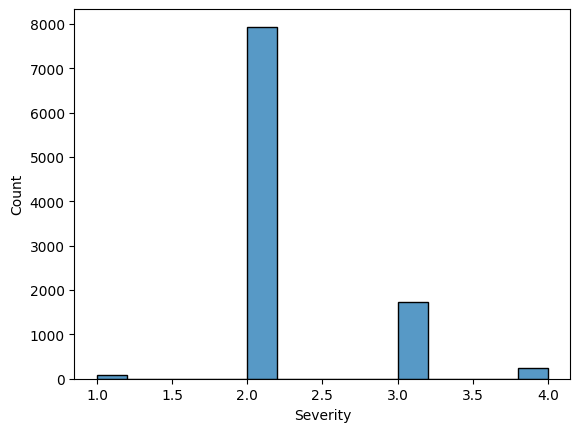

In [12]:
sns.histplot(dd['Severity'])  

<Axes: ylabel='Nautical_Twilight'>

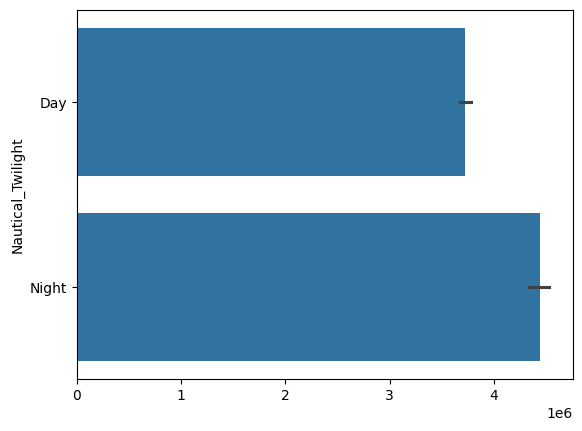

In [15]:
sns.barplot(dd['Nautical_Twilight'])

In [16]:
dd.isnull().sum()

Severity                0
Start_Time              0
End_Time                0
Start_Lat               0
Start_Lng               0
Distance(mi)            0
City                    0
State                   0
Timezone                9
Weather_Timestamp     156
Temperature(F)        215
Humidity(%)           227
Visibility(mi)        223
Wind_Speed(mph)       776
Precipitation(in)    2989
Traffic_Signal          0
Junction                0
Railway                 0
Airport_Code           39
Nautical_Twilight      30
dtype: int64

In [17]:
dd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 7133276 to 3340785
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Severity           10000 non-null  int64  
 1   Start_Time         10000 non-null  object 
 2   End_Time           10000 non-null  object 
 3   Start_Lat          10000 non-null  float64
 4   Start_Lng          10000 non-null  float64
 5   Distance(mi)       10000 non-null  float64
 6   City               10000 non-null  object 
 7   State              10000 non-null  object 
 8   Timezone           9991 non-null   object 
 9   Weather_Timestamp  9844 non-null   object 
 10  Temperature(F)     9785 non-null   float64
 11  Humidity(%)        9773 non-null   float64
 12  Visibility(mi)     9777 non-null   float64
 13  Wind_Speed(mph)    9224 non-null   float64
 14  Precipitation(in)  7011 non-null   float64
 15  Traffic_Signal     10000 non-null  bool   
 16  Junction           

In [18]:
dd['Start_Time']

7133276              2020-04-17 09:29:30
5363845    2022-04-21 10:01:00.000000000
155993               2016-08-12 16:45:00
1861414              2019-09-20 15:22:16
2021359              2019-06-03 16:55:43
                       ...              
1384172              2020-07-21 18:10:55
5540054              2021-12-02 22:27:00
7115208              2020-04-08 08:12:03
1737173              2019-10-10 19:55:48
3340785              2017-08-01 13:54:15
Name: Start_Time, Length: 10000, dtype: object

In [19]:
dd['Start_Time'] = pd.to_datetime(dd['Start_Time'], format="mixed")
print(dd.dtypes)  

Severity                      int64
Start_Time           datetime64[ns]
End_Time                     object
Start_Lat                   float64
Start_Lng                   float64
Distance(mi)                float64
City                         object
State                        object
Timezone                     object
Weather_Timestamp            object
Temperature(F)              float64
Humidity(%)                 float64
Visibility(mi)              float64
Wind_Speed(mph)             float64
Precipitation(in)           float64
Traffic_Signal                 bool
Junction                       bool
Railway                        bool
Airport_Code                 object
Nautical_Twilight            object
dtype: object


In [20]:
dd['Start_Time']

7133276   2020-04-17 09:29:30
5363845   2022-04-21 10:01:00
155993    2016-08-12 16:45:00
1861414   2019-09-20 15:22:16
2021359   2019-06-03 16:55:43
                  ...        
1384172   2020-07-21 18:10:55
5540054   2021-12-02 22:27:00
7115208   2020-04-08 08:12:03
1737173   2019-10-10 19:55:48
3340785   2017-08-01 13:54:15
Name: Start_Time, Length: 10000, dtype: datetime64[ns]

<Axes: xlabel='Distance(mi)', ylabel='Severity'>

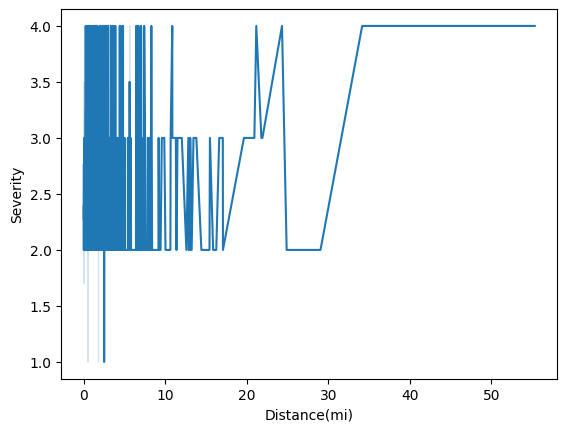

In [21]:
sns.lineplot(data=dd, x=dd["Distance(mi)"], y=dd["Severity"])

In [22]:
sns.scatterplot(data=dd, x="Distance", y="Severity", hue="Severity", palette="coolwarm", alpha=0.7)
plt.title("Accident Severity vs Distance")
plt.xlabel("Distance (miles   or km)")
plt.ylabel("Severity Level")
plt.show()


ValueError: Could not interpret value `Distance` for `x`. An entry with this name does not appear in `data`.

In [43]:
dd["Distance(mi)"]

7133276    0.000
5363845    0.045
155993     0.000
1861414    0.000
2021359    0.000
           ...  
1384172    0.000
5540054    0.351
7115208    0.000
1737173    0.000
3340785    0.000
Name: Distance(mi), Length: 10000, dtype: float64

In [44]:
dd.isna().mean()

Severity             0.0000
Start_Time           0.0000
End_Time             0.0000
Start_Lat            0.0000
Start_Lng            0.0000
Distance(mi)         0.0000
City                 0.0000
State                0.0000
Timezone             0.0009
Weather_Timestamp    0.0156
Temperature(F)       0.0215
Humidity(%)          0.0227
Visibility(mi)       0.0223
Wind_Speed(mph)      0.0776
Precipitation(in)    0.2989
Traffic_Signal       0.0000
Junction             0.0000
Railway              0.0000
Airport_Code         0.0039
Nautical_Twilight    0.0030
dtype: float64